## Importing the Entire Library:


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('moviesdb.csv', lineterminator='\n')
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
# viewing dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


Release_Date column needs to be casted into date time and to extract only the year value


In [4]:
# exploring genres column
df['Genre'].head()


0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

• genres are saperated by commas followed by whitespaces.

In [5]:
# check for duplicated rows
df.duplicated().sum()


np.int64(0)

In [6]:
# exploring summary statistics
df.describe()


,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


# Data Cleaning

Casting Release_Date column and extracing year values

In [7]:
# casting column a
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
# confirming changes
print(df['Release_Date'].dtypes)


datetime64[ns]


In [8]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes


dtype('int32')

In [9]:
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


# Dropping Overview, Original_Languege and Poster-Url

In [10]:
# making list of column to be dropped
cols = ['Overview', 'Original_Language', 'Poster_Url']


In [11]:
# dropping columns and confirming changes
df.drop(cols, axis = 1, inplace = True)
df.columns


Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

categorizing Vote_Average column

In [12]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [ ]:
# exploring column
df['Vote_Average'].value_counts()


Vote_Average
6.4     435
6.3     429
6.5     427
6.8     423
6.7     420
       ... 
9.2       1
1.8       1
2.4       1
2.6       1
10.0      1
Name: count, Length: 74, dtype: int64

In [14]:
def categorize_col(df, col, labels):
    """
    Categorizes a numerical column based on its quartiles.

    Args:
        df (pd.DataFrame): DataFrame to process.
        col (str): Column name to categorize.
        labels (list): List of labels from lowest to highest quartile.

    Returns:
        pd.DataFrame: DataFrame with a new column '<col>_category'.
    """
    # Get quartiles
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]

    # Remove duplicate edges if any
    edges = sorted(list(set(edges)))
    if len(edges) - 1 != len(labels):
        labels = labels[:len(edges) - 1]

    # Assign new column
    df[col + '_Category'] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True)

    return df


In [15]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
df = categorize_col(df, 'Vote_Average', labels)


In [16]:
print(df['Vote_Average_Category'].unique())


['popular', 'below_avg', 'average', 'not_popular']
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']


In [17]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction",popular
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller",popular
2,2022,No Exit,2618.087,122,6.3,Thriller,below_avg
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy",popular
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War",average


In [ ]:
# dropping NaNs
df.dropna(inplace = True)
# confirming
df.isna().sum()


Release_Date             0
Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Vote_Average_Category    0
dtype: int64

## we'd split genres into a list and then explode our dataframe to have only one genre per row for ezch movie

In [ ]:
# split the strings into lists
df['Genre'] = df['Genre'].str.split(', ')
# explode the lists
df = df.explode('Genre').reset_index(drop=True)
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular
3,2022,The Batman,3827.658,1151,8.1,Crime,popular
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular


In [ ]:
# casting column into category
df['Genre'] = df['Genre'].astype('category')
# confirming changes
df['Genre'].dtypes


CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [ ]:
df.nunique()


Release_Date              102
Title                    9513
Popularity               8160
Vote_Count               3266
Vote_Average               74
Genre                      19
Vote_Average_Category       4
dtype: int64

In [ ]:
sns.set_style('whitegrid')


## Q1: What is the most frequent genre in he dataset?

In [ ]:
df['Genre'].describe()


count     25793
unique       19
top       Drama
freq       3744
Name: Genre, dtype: object

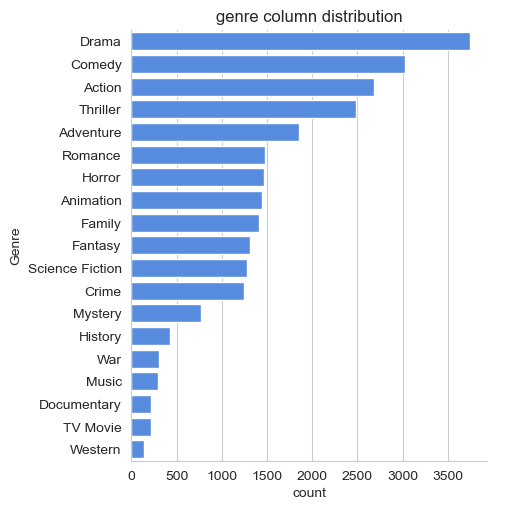

In [ ]:
# visualizing genre column
sns.catplot(y = 'Genre', data = df, kind = 'count',
order = df['Genre'].value_counts().index,
color = '#4287f5')
plt.title('genre column distribution')
plt.show()


In [ ]:
import warnings
warnings.filterwarnings("ignore")


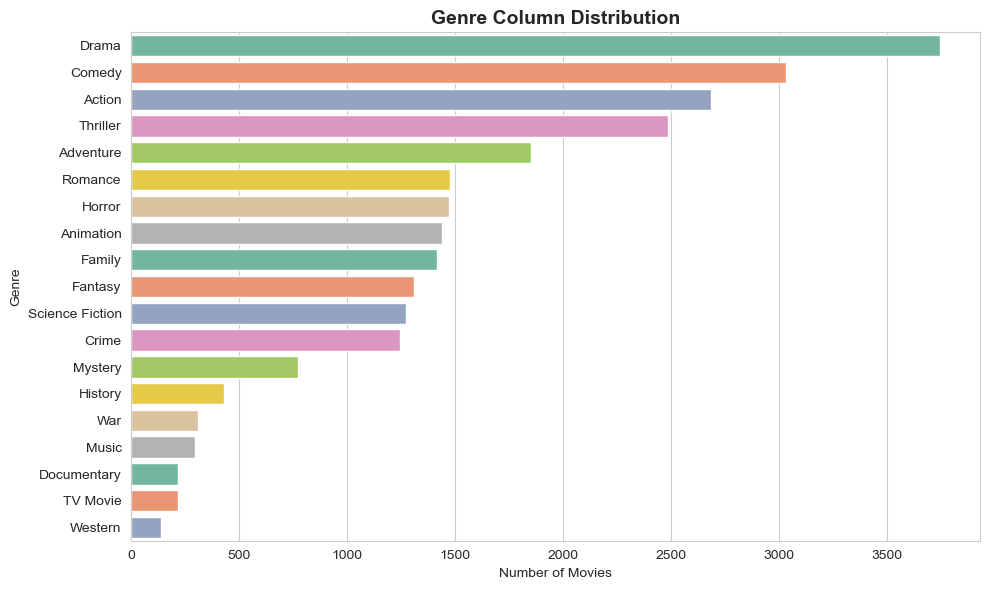

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Set custom color palette or use built-in ones like "Set2", "Paired", etc.
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(
    y='Genre',
    data=df,
    order=df['Genre'].value_counts().index,
    palette='Set2'  # or try 'Set3', 'Paired', 'coolwarm', etc.
)

plt.title('Genre Column Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


## Q2: What genres has highest votes

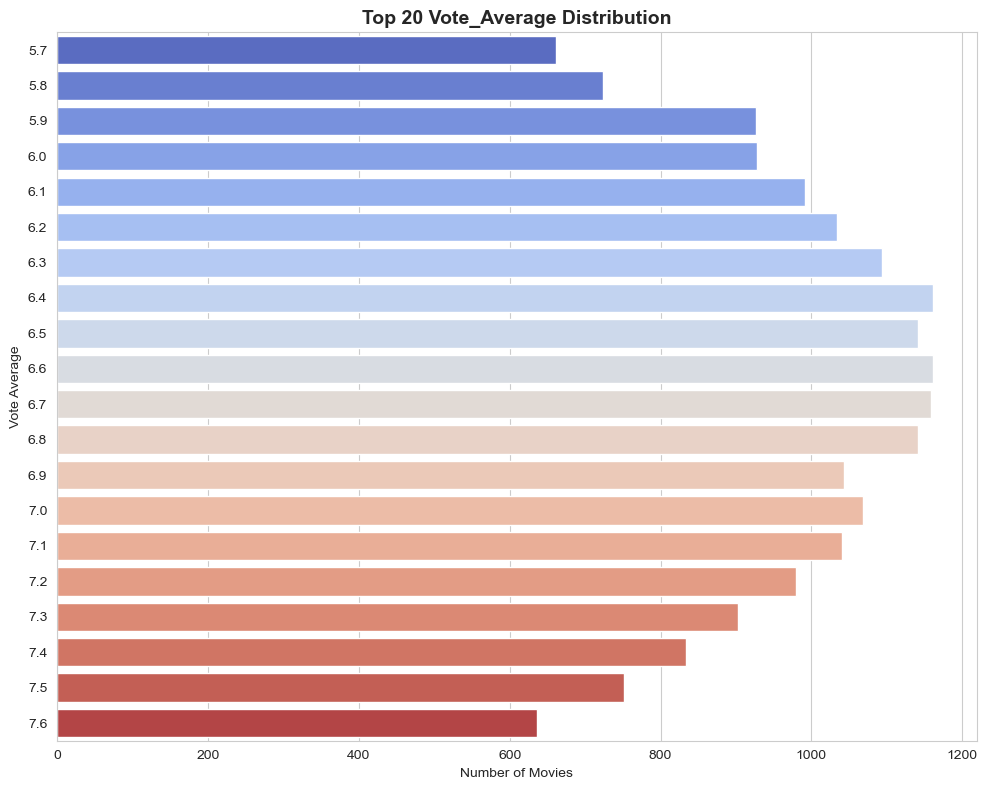

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎯 Step 1: Get top 20 vote averages
top_20_votes = df['Vote_Average'].value_counts().nlargest(20).index

# 🎨 Step 2: Set style
sns.set_style("whitegrid")
plt.figure(figsize=(10, 8))

# 📊 Step 3: Countplot using top 20
sns.countplot(
    y='Vote_Average',
    data=df[df['Vote_Average'].isin(top_20_votes)],
    order=sorted(top_20_votes),
    palette='coolwarm'
)

# 🏷️ Step 4: Add labels and title
plt.title('Top 20 Vote_Average Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Number of Movies')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()


## Q3: What movie got the highest popularity ? what's its genre ?

In [ ]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular


In [30]:
# Step 1: Find the row with the highest popularity
most_popular_movie = df.loc[df['Popularity'].idxmax()]

# Step 2: Display relevant details
print("🎬 Movie with Highest Popularity:")
print(f"Title        : {most_popular_movie['Title']}")
print(f"Popularity   : {most_popular_movie['Popularity']}")
print(f"Genre        : {most_popular_movie['Genre']}")
print(f"Vote Average : {most_popular_movie['Vote_Average']}")
print(f"Vote Count   : {most_popular_movie['Vote_Count']}")


🎬 Movie with Highest Popularity:
Title        : Spider-Man: No Way Home
Popularity   : 5083.954
Genre        : Action
Vote Average : 8.3
Vote Count   : 8940


In [ ]:
top_movie = df[df['Popularity'] == df['Popularity'].max()]
title = top_movie['Title'].iloc[0]
popularity = top_movie['Popularity'].iloc[0]
vote_avg = top_movie['Vote_Average'].iloc[0]
vote_count = top_movie['Vote_Count'].iloc[0]
genres = top_movie['Genre'].unique()

print("🎬 Movie with Highest Popularity")
print(f"Title       : {title}")
print(f"Popularity  : {popularity}")
print(f"Vote Average: {vote_avg}")
print(f"Vote Count  : {vote_count}")
print(f"Genres      : {', '.join(genres)}")


🎬 Movie with Highest Popularity
Title       : Spider-Man: No Way Home
Popularity  : 5083.954
Vote Average: 8.3
Vote Count  : 8940
Genres      : Action, Adventure, Science Fiction


##  Q4: What movie got the lowest popularity? What’s its genre?

In [ ]:
# checking max popularity in dataset
df[df['Popularity'] == df['Popularity'].min()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category
25787,2021,The United States vs. Billie Holiday,13.354,152,6.7,Music,average
25788,2021,The United States vs. Billie Holiday,13.354,152,6.7,Drama,average
25789,2021,The United States vs. Billie Holiday,13.354,152,6.7,History,average
25790,1984,Threads,13.354,186,7.8,War,popular
25791,1984,Threads,13.354,186,7.8,Drama,popular
25792,1984,Threads,13.354,186,7.8,Science Fiction,popular


In [ ]:
# Get all rows with lowest popularity
least_popular = df[df['Popularity'] == df['Popularity'].min()]

# Extract details
title = least_popular['Title'].iloc[0]
popularity = least_popular['Popularity'].iloc[0]
vote_avg = least_popular['Vote_Average'].iloc[0]
vote_count = least_popular['Vote_Count'].iloc[0]
genres = least_popular['Genre'].unique()

# Print formatted result
print("🎬 Movie with Lowest Popularity")
print(f"Title        : {title}")
print(f"Popularity   : {popularity}")
print(f"Vote Average : {vote_avg}")
print(f"Vote Count   : {vote_count}")
print(f"Genres       : {', '.join(genres)}")


🎬 Movie with Lowest Popularity
Title        : The United States vs. Billie Holiday
Popularity   : 13.354
Vote Average : 6.7
Vote Count   : 152
Genres       : Music, Drama, History, War, Science Fiction


## Q5: Which year has the most filmmed movies?

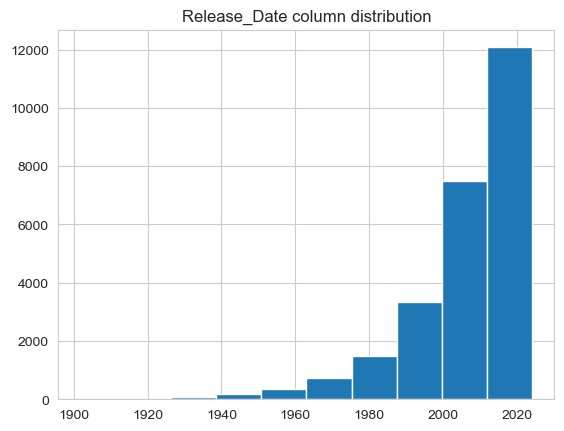

In [ ]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.show()


In [ ]:
# Count how many movies were released each year
year_counts = df['Release_Date'].value_counts().sort_values(ascending=False)

# Display top year
top_year = year_counts.index[0]
top_count = year_counts.iloc[0]

print(f"📅 Year with the most filmed movies: {top_year}")
print(f"🎬 Number of movies released: {top_count}")


📅 Year with the most filmed movies: 2021
🎬 Number of movies released: 1638


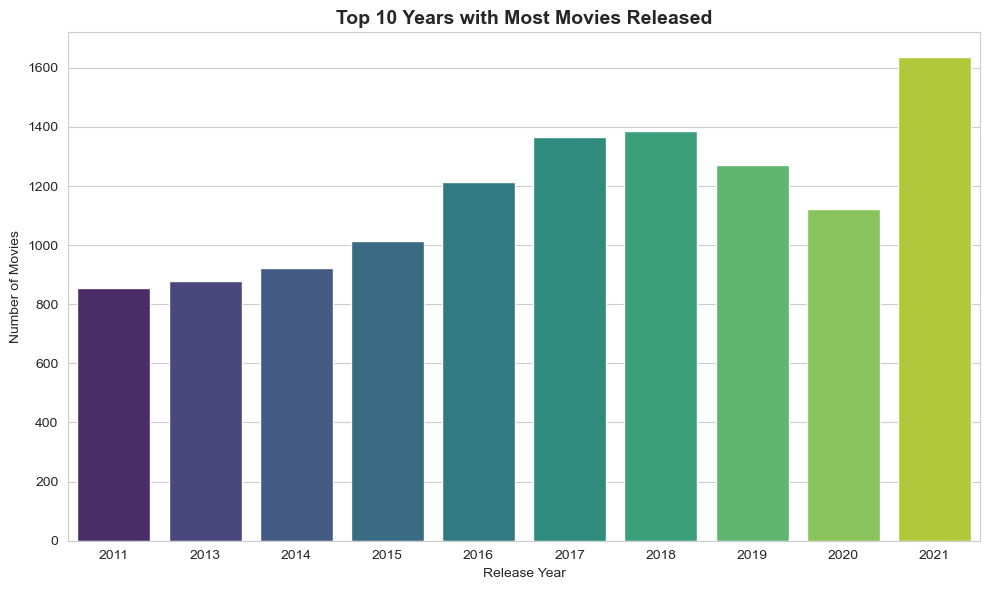

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.head(10).index, y=year_counts.head(10).values, palette='viridis')

plt.title('Top 10 Years with Most Movies Released', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()


In [37]:
# 1. Convert float/int to string first
df['Release_Year'] = pd.to_datetime(df['Release_Date'].astype(str), format='%Y', errors='coerce')

# 2. Then extract the year as an integer
df['Release_Year'] = df['Release_Year'].dt.year


In [ ]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular,2021
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular,2021
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular,2021
3,2022,The Batman,3827.658,1151,8.1,Crime,popular,2022
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular,2022


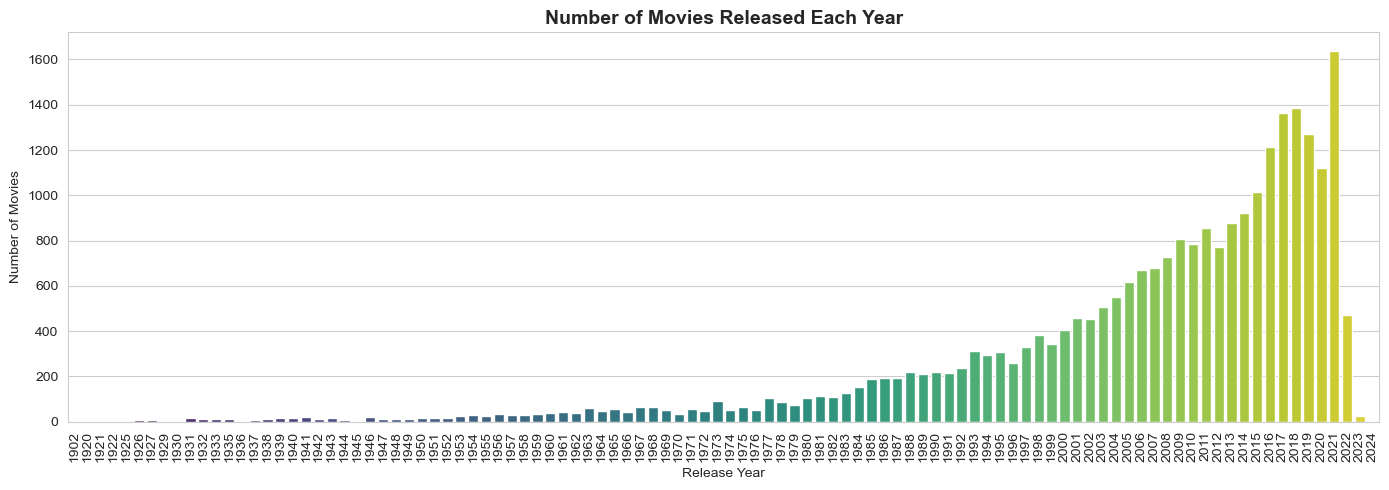

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count movies per year
year_counts = df['Release_Year'].value_counts().sort_index()

# Step 2: Plot
plt.figure(figsize=(14, 5))
sns.barplot(x=year_counts.index, y=year_counts.values, palette='viridis')

plt.title('Number of Movies Released Each Year', fontsize=14, fontweight='bold')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Year with most movies: 2021 (1638 movies)

In [ ]:
df.head()


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category,Release_Year
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Action,popular,2021
1,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Adventure,popular,2021
2,2021,Spider-Man: No Way Home,5083.954,8940,8.3,Science Fiction,popular,2021
3,2022,The Batman,3827.658,1151,8.1,Crime,popular,2022
4,2022,The Batman,3827.658,1151,8.1,Mystery,popular,2022


# Q6: What is the average vote per genre?
### ➡️ Tells us which genre tends to get higher average ratings.



In [43]:
# ✅ Step 1: Convert Genre to string (avoid Categorical error)
df['Genre'] = df['Genre'].astype(str)

# ✅ Step 2: Split by comma (only if it looks like a string)
df['Genre'] = df['Genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# ✅ Step 3: Remove extra whitespace
df['Genre'] = df['Genre'].apply(lambda x: [g.strip() for g in x])

# ✅ Step 4: Explode the genre column into multiple rows
df_exploded = df.explode('Genre')

# ✅ Step 5: Group by genre and calculate average vote
avg_vote_per_genre = df_exploded.groupby('Genre')['Vote_Average'].mean().sort_values(ascending=False)

# ✅ Step 6: Print result
print("🎯 Q6: Average Vote per Genre")
print(avg_vote_per_genre)


🎯 Q6: Average Vote per Genre
Genre
History            6.965574
War                6.948701
Music              6.879322
Animation          6.846560
Western            6.754745
Drama              6.706143
Documentary        6.663721
Family             6.581047
Romance            6.560772
Crime              6.552013
Fantasy            6.526300
Adventure          6.456719
TV Movie           6.438318
Mystery            6.434282
Comedy             6.382976
Action             6.330268
Science Fiction    6.257423
Thriller           6.246141
Horror             5.940068
Name: Vote_Average, dtype: float64


# Q7: Which movie got the highest vote count?
### ➡️ Finds the most "voted" or engaged movie.

In [ ]:
df[df['Vote_Count'] == df['Vote_Count'].max()]


,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre,Vote_Average_Category,Release_Year
1090,2010,Inception,127.131,31077,8.4,[Action],popular,2010
1091,2010,Inception,127.131,31077,8.4,[Science Fiction],popular,2010
1092,2010,Inception,127.131,31077,8.4,[Adventure],popular,2010


# Q8: Which genre appears most frequently?
#### ➡️ Finds the most common genre in the dataset.

In [ ]:
df_exploded['Genre'].value_counts().head(1)


Genre
Drama    3744
Name: count, dtype: int64


# Q9: How many movies fall into each Vote_Average_Category?
#### ➡️ Distribution of movies by popularity level.

In [ ]:
df['Vote_Average_Category'].value_counts()


Vote_Average_Category
average        6613
popular        6520
below_avg      6348
not_popular    6312
Name: count, dtype: int64

# Q10: What is the average popularity per genre?
#### ➡️ Which genre generates the most buzz or trending?

In [ ]:
df_exploded.groupby('Genre')['Popularity'].mean().sort_values(ascending=False)


Genre
Adventure          53.742888
Fantasy            53.081342
Animation          52.433848
Action             50.890133
Science Fiction    49.511334
Family             46.610616
Crime              44.747295
Thriller           42.946258
Mystery            40.093590
Horror             38.264498
Comedy             37.873669
Western            36.187912
War                35.298075
Music              33.771410
Romance            30.866030
Drama              30.077651
TV Movie           29.954715
Documentary        29.235377
History            28.395827
Name: Popularity, dtype: float64